# **Import semua library**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# **Gathering Data**

In [2]:
df = pd.read_csv('diagnosed_cbc_data_v4.csv')

In [3]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


# **Exploratory Data Analysis**

Mengecek informasi data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [5]:
df.shape

(1281, 15)

Tidak terdapat missing value dalam dataset

In [6]:
df.isna().sum()

,0
WBC,0
LYMp,0
NEUTp,0
LYMn,0
NEUTn,0
RBC,0
HGB,0
HCT,0
MCV,0
MCH,0


Terdapat juga data duplikat sebanyak 49 data

In [7]:
df.duplicated().sum()

np.int64(49)

In [8]:
df[df.duplicated()]

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
202,5.60,35.600,56.900,2.00000,3.20000,4.31,11.0,36.3000,84.3,25.5,30.3,171.0,13.100000,0.15000,Normocytic hypochromic anemia
215,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,29.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
247,5.40,27.800,65.800,1.50000,3.60000,4.45,11.3,37.4000,84.2,25.3,30.2,166.0,13.600000,0.15000,Normocytic hypochromic anemia
269,5.90,16.200,78.400,1.00000,4.60000,4.27,11.3,36.5000,85.7,26.4,30.9,155.0,13.100000,0.15000,Normocytic hypochromic anemia
405,8.70,7.300,85.800,0.60000,7.50000,4.44,12.9,39.6000,89.3,29.0,32.5,140.0,11.300000,0.12000,Normocytic normochromic anemia
406,8.30,20.000,70.300,1.70000,5.80000,5.59,10.0,34.7000,62.1,17.8,28.8,203.0,12.800000,0.17000,Iron deficiency anemia
407,5.40,11.300,81.600,0.60000,4.40000,3.72,9.8,32.1000,86.4,26.3,30.5,125.0,12.000000,0.11000,Normocytic hypochromic anemia
411,8.70,7.300,85.800,0.60000,7.50000,4.44,12.9,39.6000,89.3,29.0,32.5,140.0,11.300000,0.12000,Normocytic normochromic anemia
439,8.50,19.600,71.500,1.70000,6.00000,3.59,8.7,28.5000,79.5,24.2,30.5,122.0,11.300000,0.10000,Iron deficiency anemia
441,3.20,35.600,56.200,1.10000,1.80000,5.22,14.9,45.8000,87.8,28.5,32.5,132.0,14.300000,0.13000,Thrombocytopenia


Karena jumlah duplikat sedikit dibandingkan total data yang cukup besar, maka data duplikat saya hapus.

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,7.846713,25.897658,77.591978,1.884341,5.130724,4.714294,12.187589,46.269150,85.734099,32.250877,31.739732,228.927922,14.340931,0.261623
std,3.552180,7.064941,150.651596,1.357362,2.895636,2.867519,3.863201,106.945982,27.663902,113.356653,3.354512,93.080258,3.053868,0.698735
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.000000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,70.775000,1.880760,5.000000,4.190000,10.800000,39.200000,81.000000,25.500000,30.500000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.200000,46.152600,86.550000,27.700000,32.000000,211.000000,14.312512,0.260280
75%,8.700000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.152600,90.200000,29.600000,32.900000,290.000000,14.800000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.000000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


Distribusi total kategori diagnosis

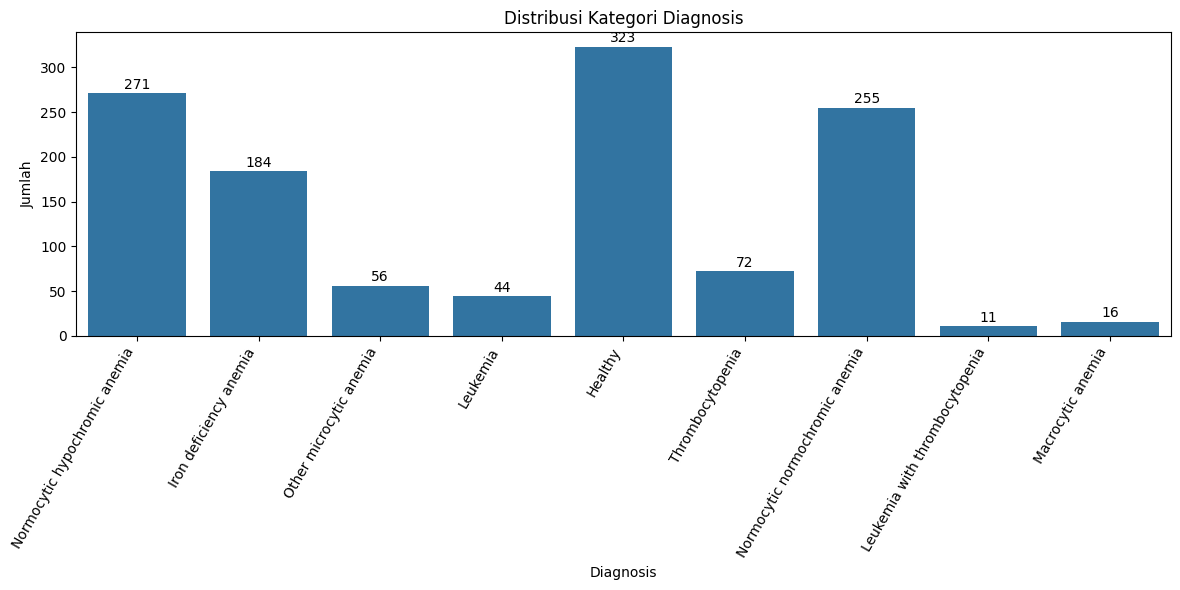

In [12]:
categorical_col = 'Diagnosis'

plt.figure(figsize=(12, 6))
ax = sns.countplot(x=categorical_col, data=df)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5, int(p.get_height()), ha='center')
plt.title('Distribusi Kategori Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Distribusi semua fitur numerik

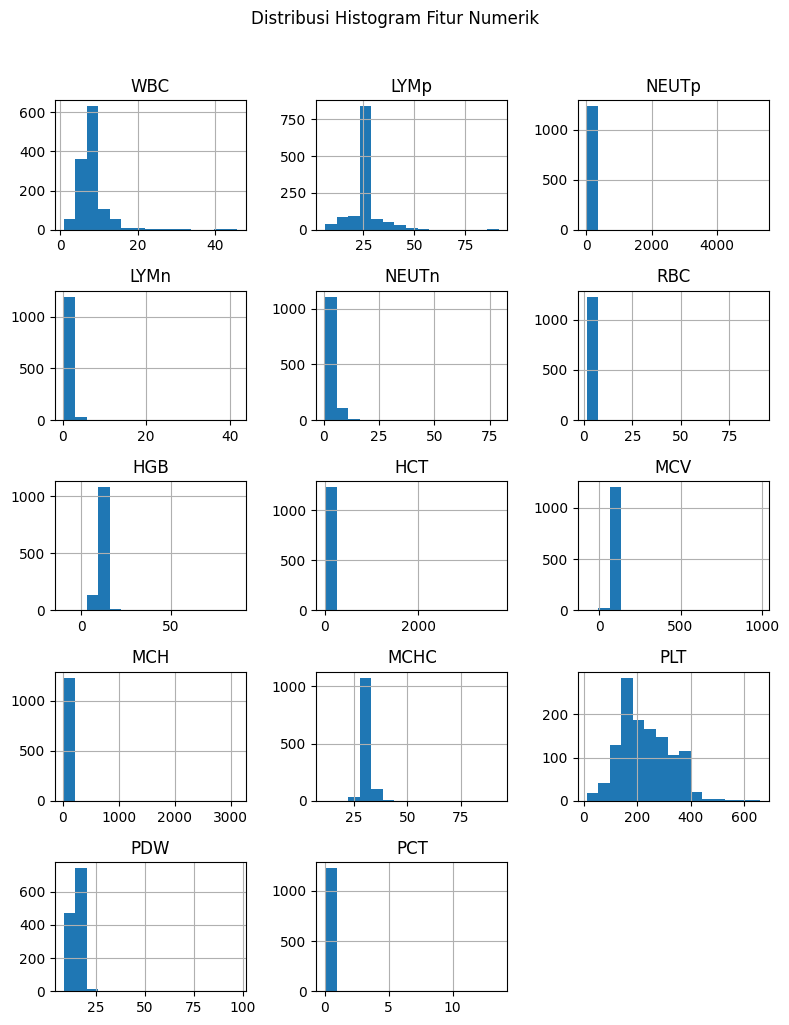

In [13]:
numerical_cols = df.select_dtypes(include='float64').columns

df[numerical_cols].hist(bins=15, figsize=(8, 10), layout=(5, 3))
plt.suptitle('Distribusi Histogram Fitur Numerik', y=1.02)
plt.tight_layout()
plt.show()

Pengecekan oulier

Outlier tidak dihapus karena dapat menjadi indikator penting dalam klasifikasi tipe anemia. Dengan 1.281 entri, pengaruhnya terhadap distribusi data minim. Selain itu, algoritma seperti Random Forest dan XGBoost cukup robust terhadap outlier.

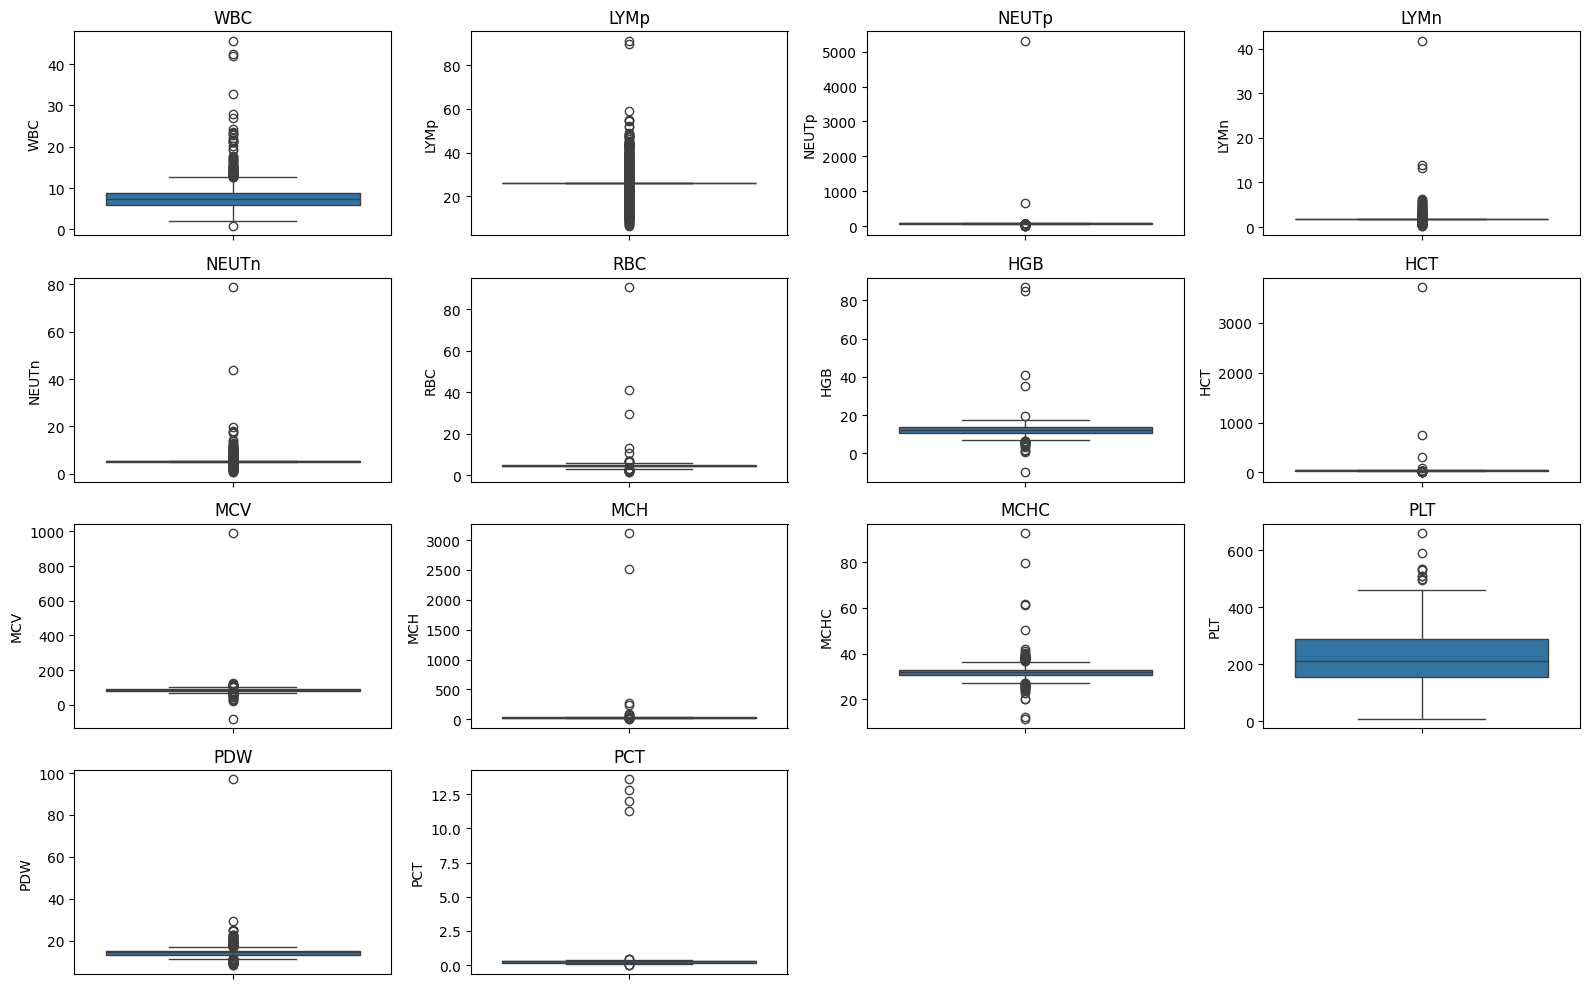

In [14]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

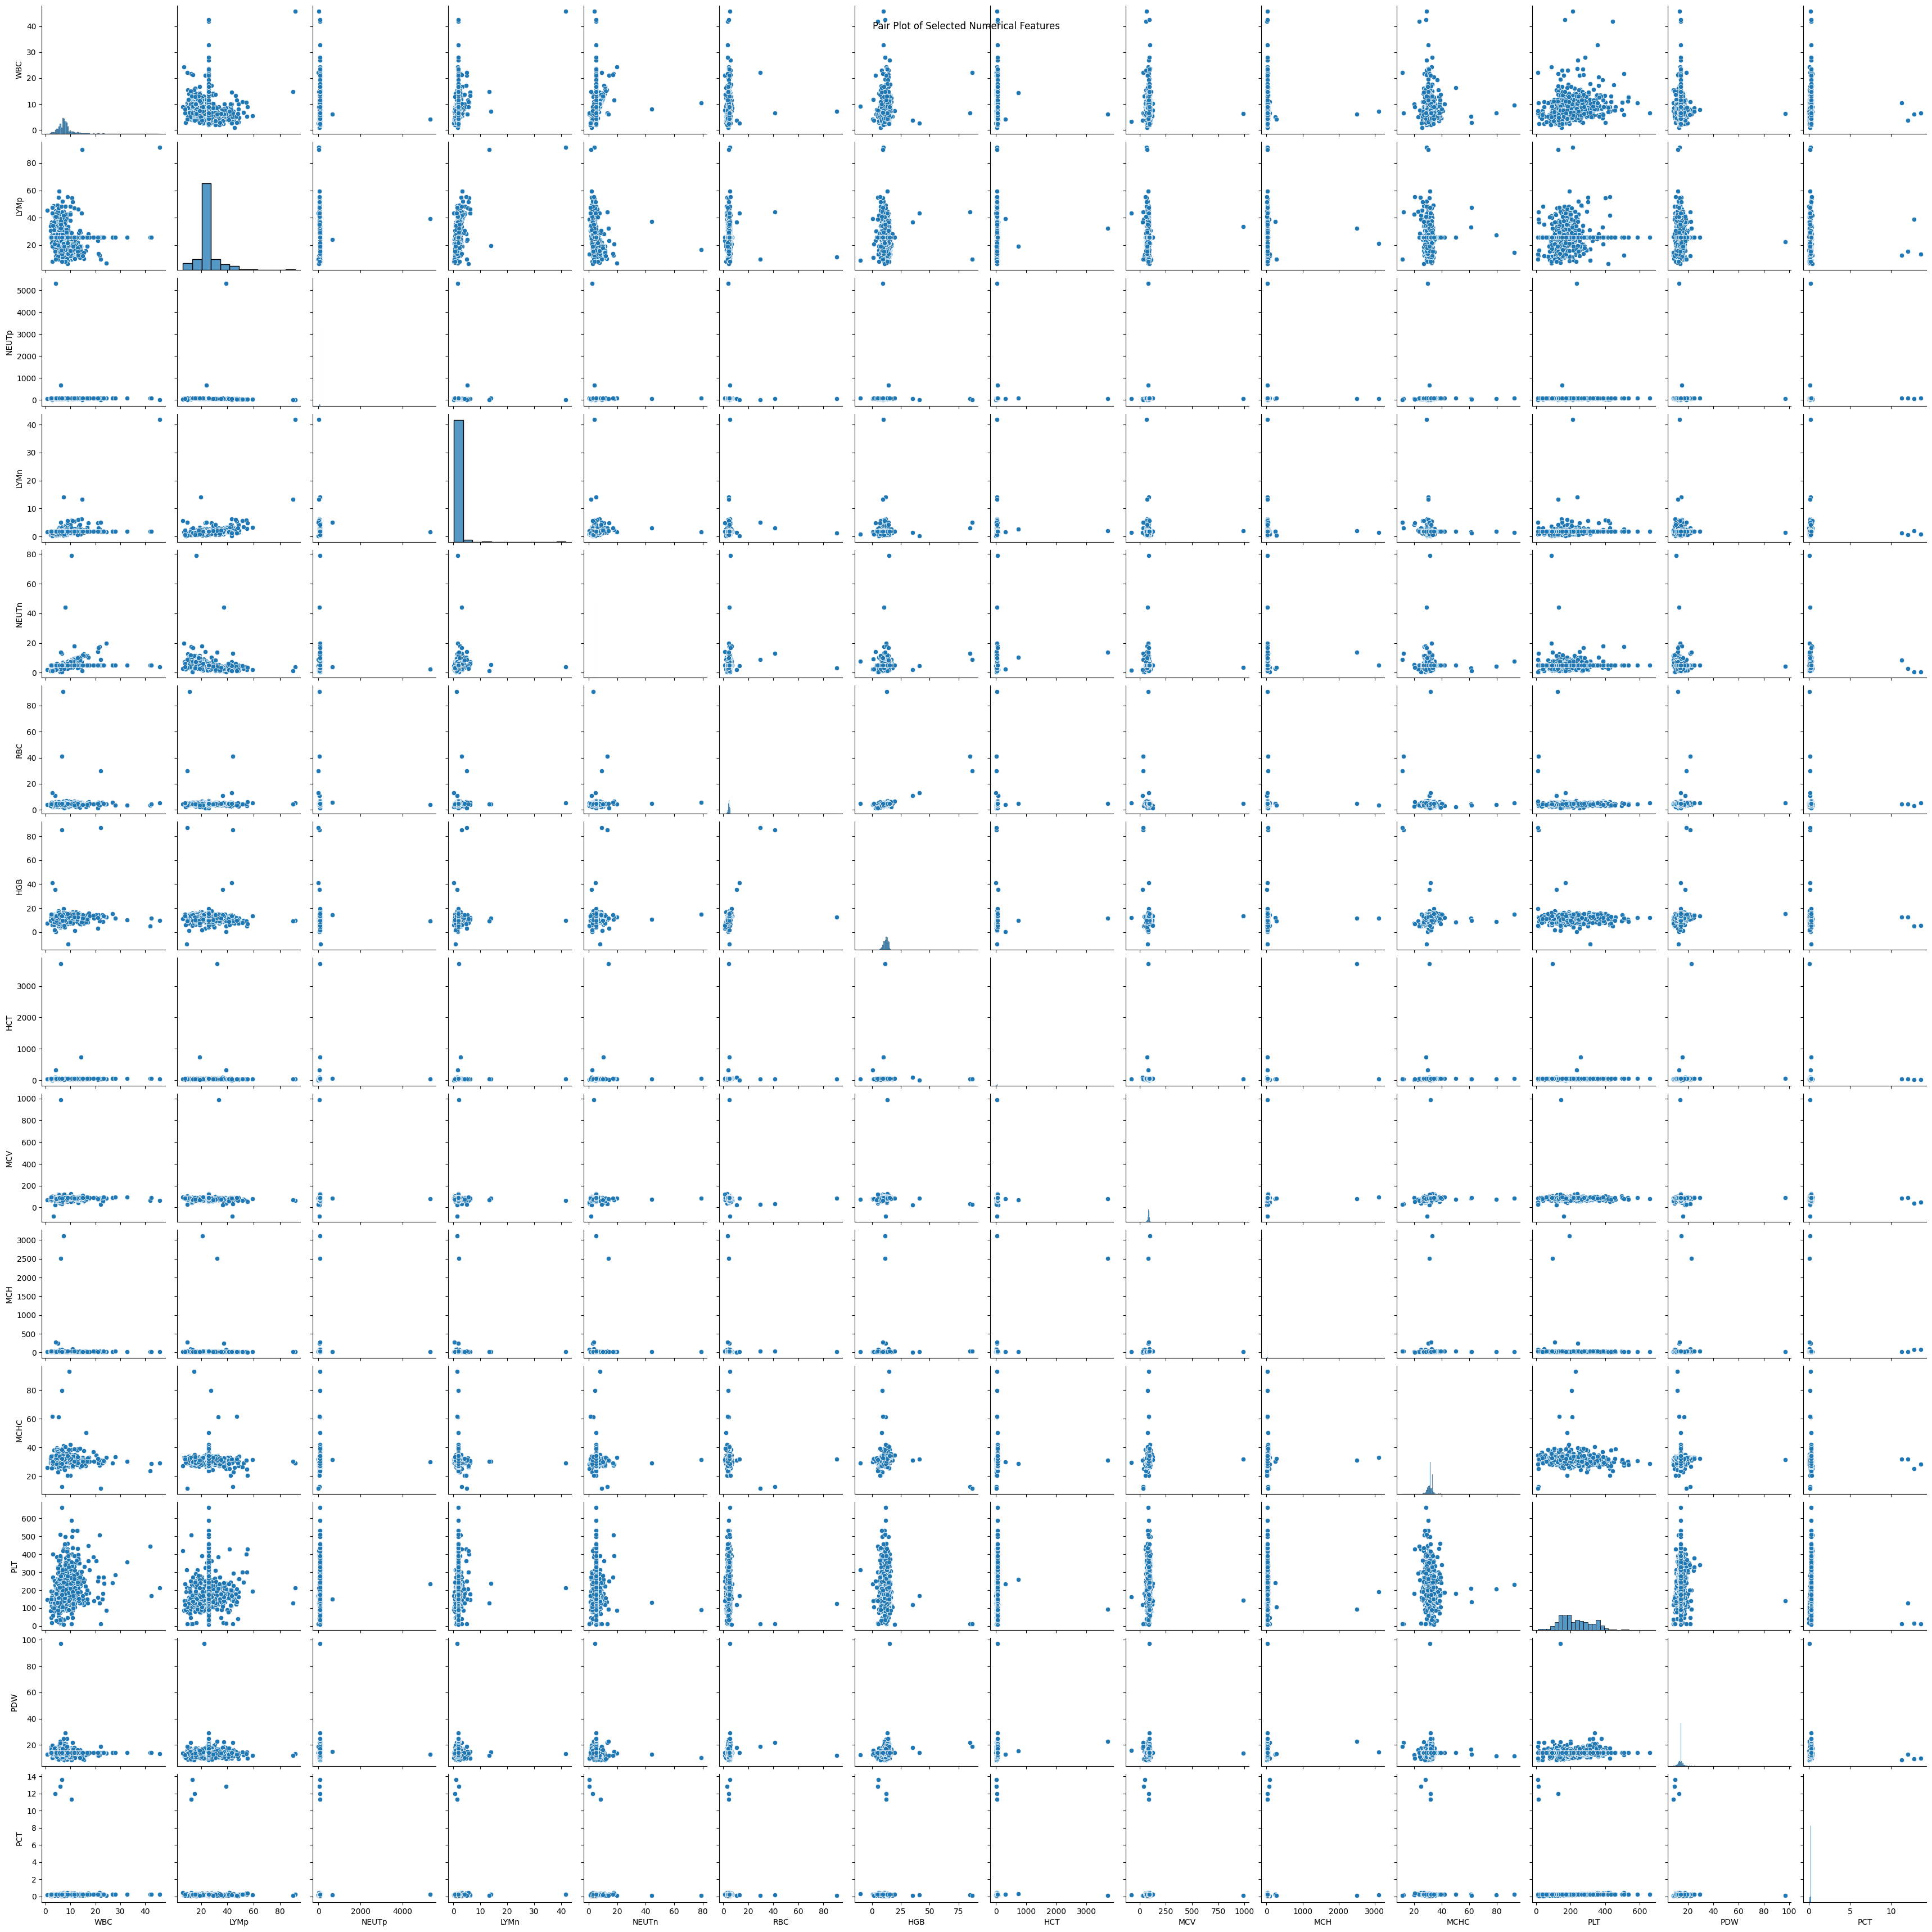

In [15]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Selected Numerical Features')
plt.show()

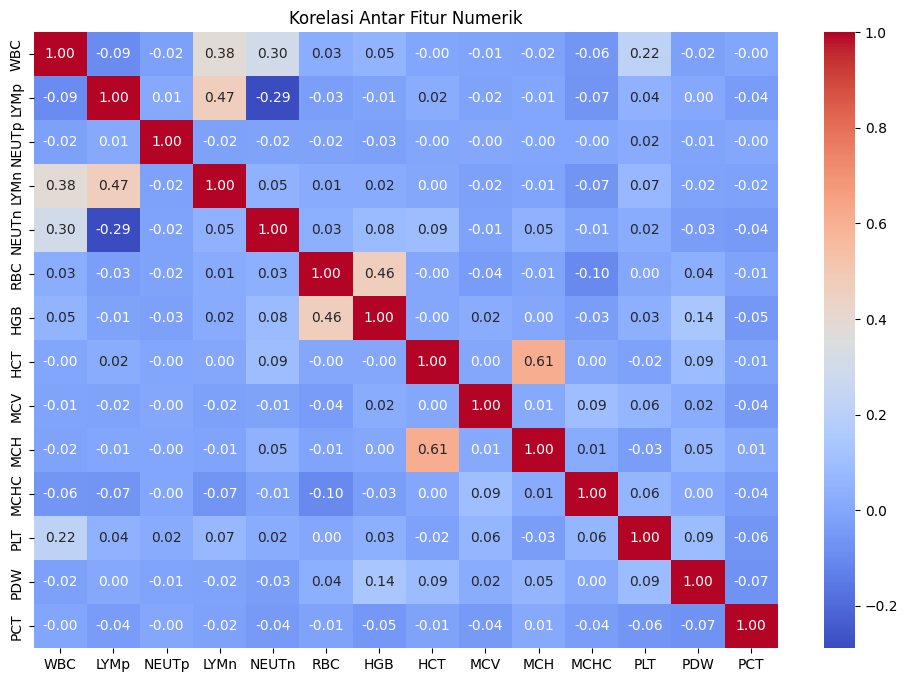

In [16]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

## **Data preparation**

Encoding fitur kategori yaitu diagnosis

In [17]:
le = LabelEncoder()
df[categorical_col] = le.fit_transform(df[categorical_col])

In [18]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,5
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,5
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,1
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,1
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,5


Normalisasi semua fitur numerik

In [19]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [20]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,0.606434,2.450037,-0.182561,1.780395,-0.045164,-0.678316,-1.265679,-0.206442,0.071093,-0.052518,-0.489012,-0.429137,-0.603064,-0.131180,5
1,0.606434,2.336756,-0.167952,1.706693,0.058483,-0.653894,-1.265679,-0.198958,0.089174,-0.057813,-3.441460,-0.525867,-0.603064,-0.145497,5
2,-0.182135,0.680019,-0.112172,0.232648,-0.252456,-0.259666,-0.825451,-0.147510,-0.315850,-0.085172,-0.667949,-0.869795,-0.013408,-0.174132,1
3,-0.520093,0.609218,-0.093578,-0.062161,-0.459749,-0.172447,-2.172032,-0.125995,-0.283304,-0.079877,-0.578481,-0.923534,-0.996168,-0.202767,1
4,-1.027029,1.869471,-0.158655,-0.209565,-0.977980,-0.273621,-3.052488,2.523147,-0.185664,-0.073699,-0.608303,0.076009,-0.504788,-0.059593,5


Pemisahan fitur dan target, serta train test split

In [21]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(f'Jumlah data training (X_train): {X_train.shape}')
print(f'Jumlah data testing (X_test): {X_test.shape}')
print(f'Jumlah target training (y_train): {y_train.shape}')
print(f'Jumlah target testing (y_test): {y_test.shape}')

Jumlah data training (X_train): (985, 14)
Jumlah data testing (X_test): (247, 14)
Jumlah target training (y_train): (985,)
Jumlah target testing (y_test): (247,)


# **Modeling dan Hasil Evaluasi**

### **Random Forest**

In [23]:
model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=None
)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred_rf = model_rf.predict(X_test)

In [25]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)

Random Forest Accuracy: 0.9919028340080972
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      0.98      0.99        53
           6       0.98      1.00      0.99        53
           7       1.00      1.00      1.00         9
           8       1.00      0.95      0.97        19

    accuracy                           0.99       247
   macro avg       1.00      0.99      0.99       247
weighted avg       0.99      0.99      0.99       247



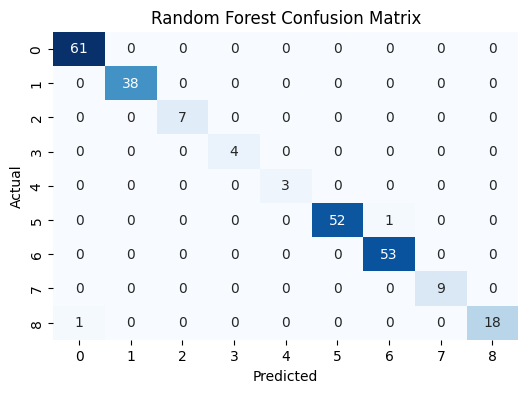

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **XGBoost**

In [27]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
y_pred_xgb = model_xgb.predict(X_test)

In [29]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, zero_division=0)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"\nXGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:")
print(report_xgb)


XGBoost Accuracy: 0.9919028340080972
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        38
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        53
           6       1.00      1.00      1.00        53
           7       0.90      1.00      0.95         9
           8       1.00      0.95      0.97        19

    accuracy                           0.99       247
   macro avg       0.99      0.99      0.99       247
weighted avg       0.99      0.99      0.99       247



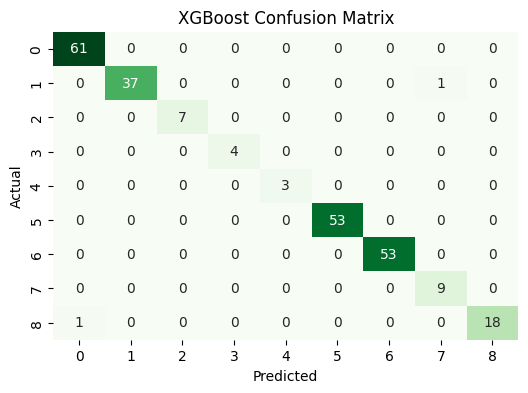

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=model_xgb.classes_, yticklabels=model_xgb.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **SVM**

In [31]:
model_svm = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    random_state=None
)
model_svm.fit(X_train, y_train)

SVC()

In [32]:
y_pred_svm = model_svm.predict(X_test)

In [33]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, zero_division=0)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f"\nSVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:\n", report_svm)


SVM Accuracy: 0.7530364372469636
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        61
           1       0.89      0.82      0.85        38
           2       0.62      0.71      0.67         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.70      0.79      0.74        53
           6       0.70      0.85      0.77        53
           7       0.00      0.00      0.00         9
           8       0.73      0.42      0.53        19

    accuracy                           0.75       247
   macro avg       0.49      0.50      0.49       247
weighted avg       0.71      0.75      0.72       247



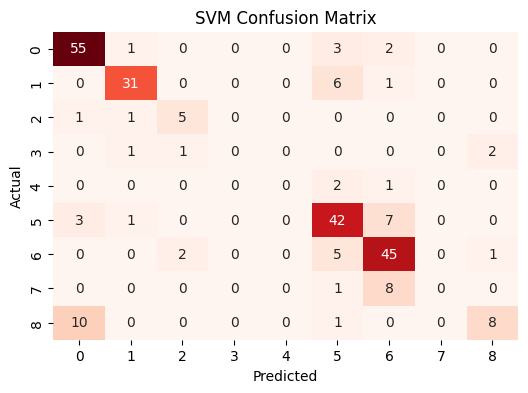

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
data = {
    'accuracy': [accuracy_rf, accuracy_xgb, accuracy_svm]
}

df_accuracy = pd.DataFrame(data, index=['Random Forest', 'XGBoost', 'SVM'])
df_accuracy

,accuracy
Random Forest,0.991903
XGBoost,0.991903
SVM,0.753036


Sebelum tuning model random forest dan XGBoost memberikan hasil yang sama-sama sangat baik

# **Hyperparameter Tuning**



In [36]:
# Setup hyperparameter grid dan model
param_grid = {
    'RF': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    'XGB': {'n_estimators': [100, 200], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
}

estimators = {
    'RF': RandomForestClassifier(),
    'SVM': SVC(),
    'XGB': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Simpan output terbaik
hasil = {}

for nama, clf in estimators.items():
    gs = GridSearchCV(clf, param_grid[nama], cv=5, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)

    best = gs.best_estimator_
    acc_cv = cross_val_score(best, X_train, y_train, cv=5).mean()
    acc_test = best.score(X_test, y_test)

    hasil[nama] = {
        'Param Terbaik': gs.best_params_,
        'Akurasi Cross Validation': round(acc_cv, 4),
        'Akurasi Test': round(acc_test, 4),
        'Evaluasi': "Overfit" if acc_cv > acc_test + 0.02 else "Underfit" if acc_test > acc_cv + 0.02 else "Fit"
    }

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [37]:
pd.set_option('display.max_colwidth', None)

df_hasil = pd.DataFrame.from_dict(hasil, orient='index').reset_index().rename(columns={'index': 'Model'})
df_hasil

,Model,Param Terbaik,Akurasi Cross Validation,Akurasi Test,Evaluasi
0,RF,"{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}",0.9787,0.9879,Fit
1,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.8731,0.9190,Underfit
2,XGB,"{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}",0.9909,0.9879,Fit


Setelah dilakukan tuning hyperparameter, Random Forest dan XGBoost tetap menunjukkan performa yang tinggi dan stabil, meskipun akurasi test keduanya sedikit menurun dibandingkan sebelum tuning. Keduanya berada dalam kategori fit berdasarkan evaluasi hasil cross-validation dan data test. Sementara itu, SVM mengalami peningkatan akurasi yang signifikan setelah tuning, namun performanya masih belum menyamai dua model lainnya dan dikategorikan underfit.

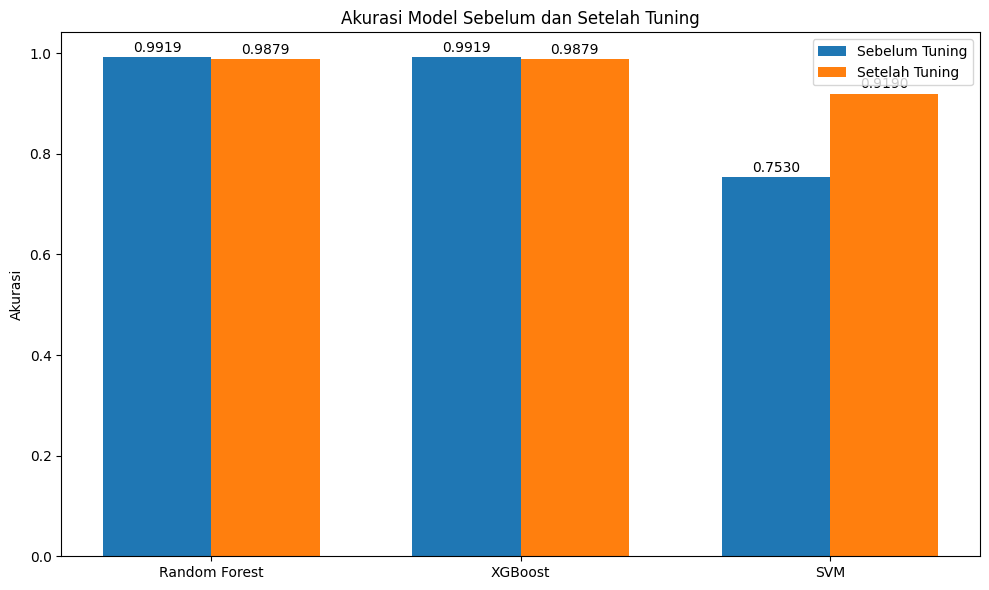

In [38]:
model_alias = {'RF': 'Random Forest', 'XGB': 'XGBoost', 'SVM': 'SVM'}
models = list(model_alias.keys())
accuracy_before = [accuracy_rf, accuracy_xgb, accuracy_svm]
accuracy_after = [df_hasil.loc[df_hasil['Model'] == m, 'Akurasi Test'].values[0] for m in models]

# Grafik
x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([i - width/2 for i in x], accuracy_before, width, label='Sebelum Tuning')
bars2 = ax.bar([i + width/2 for i in x], accuracy_after, width, label='Setelah Tuning')

ax.set_ylabel('Akurasi')
ax.set_title('Akurasi Model Sebelum dan Setelah Tuning')
ax.set_xticks(x)
ax.set_xticklabels([model_alias[m] for m in models])
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()